<h1>The Iris Dataset </h1>
 The Iris dataset, which can be found <a href="https://archive.ics.uci.edu/ml/datasets/iris">here</a> is one of the most famous and introductory datasets in machine learning and data science. Modeled after <a href="https://rdcu.be/biTg0"> Fisher's experiment </a> done in 1936, it was collected to model the differences in the sepal length and width and pedal length and width of three different Iris species: <i> Iris setosa, Iris Virginica </i> and <i> Iris Versicolor. </i> 
 Various machine learning projects use this as a way to teach beginners about simple algorithms and how to use their data science skills efficiently. 

---

The goal of this Collaboratory is to attempt to use my current skills of data exploration, wrangling and machine learning to predict the given flower species given the attributes. Therefore, this is a <b> classification </b> problem, rather than a regression or clustering one. <br>

---
<h2> Pictures </h2>
<br>

<figure>
  <img src="http://mirlab.org/jang/books/dcpr/image/iris.gif" alt="Picture of the Petal and Sepal" height="200" width="200">
  <figcaption> Picture of the Petal and Sepal </figcaption>
</figure>

  <figure>
    <img src="http://mirlab.org/jang/books/dcpr/image/Iris-setosa-10_1.jpg" alt="Iris Setosa" height="100" width="100">
      <figcaption> <i> Iris Setosa </i> </figcaption>
  </figure>
  <figure>
  <img src="http://mirlab.org/jang/books/dcpr/image/Iris-versicolor-21_1.jpg" alt="Iris Virginica" height="100" width="100">
  <figcaption> <i> Iris Virginica </i> </figcaption>
  </figure>
  <figure>
  <img src="http://mirlab.org/jang/books/dcpr/image/Iris-virginica-3_1.jpg" alt="Iris Versicolor" height="100" width="100">
    <figcaption> <i> Iris Versicolor </i> </figcaption>
  </figure>



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint

# Models
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.linear_model import LogisticRegression # Logistic Regression (NOT FOR REGRESSION)
from sklearn.neural_network import MLPClassifier # Perceptron

import os.path
import os

%matplotlib inline

print("All set up!")

All set up!


In [11]:
data = load_iris()
print(f"Feature Names: {data.feature_names}.")
print(f"Target Names: {data.target_names}.")

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].
Target Names: ['setosa' 'versicolor' 'virginica'].


In [12]:
len(data.data)

150

In [13]:
print("Data: ")
print(data.data[:5])
print("Target: ")
print(data.target[:5])

Data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target: 
[0 0 0 0 0]


In [14]:
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=.2, random_state=4)
models = (SVC(gamma='auto'), 
          RandomForestClassifier(n_estimators=1000), 
          MLPClassifier(), 
          DecisionTreeClassifier(), 
          GaussianNB(), 
          LogisticRegression(solver='lbfgs', multi_class='auto'))

if not os.path.exists("reports"):
  os.mkdir('reports')

for model in models:
  model_name = type(model).__name__
  model.fit(train_x, train_y)
  predict_y = model.predict(test_x)
  report = classification_report(test_y, predict_y, target_names=data.target_names)
  
  print(model_name)
  print(report)
  
  with open(os.path.join('reports', f"{model_name}_iris.txt"), 'w') as f:
    f.write(report)
    
print('All reports written to file!')


SVC
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30

RandomForestClassifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30

MLPClassifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Preliminary Results 

From the dataset, we can see the results in the text files for the best classical models that can model the Iris dataset. Though grid search was not done to find optimal parameters, the best models that seemed to work for Iris prediction were:


*   Decision Trees (97%)
*   Logistic Regression (97%)
*   SVC (97%)
*   Random Forest (97%)

Suprisingly, the multi layer perceptron and naive bayes were not particularly strong with this dataset. Perhaps, the learning rate and solver should be adjusted to deal with this problem as well as checking the correlation between the variables (naive bayes assumes the data is independent)

However, this does not mean that the MLP and Naive Bayes are the worst classical machine learning algorithms to deal with this classification problem. Instead, grid search should be done to find better parameters to see what triggers it to work well and reach 97% accuracy like the others.






# Grid Search

Let's try it first with the MLP to see if we can get any performance improvements compared to its default performance.

In [18]:
mlp_classifier = MLPClassifier()
print(mlp_classifier)

# To do randomized grid search, we need the kwargs for the search to look through.
# See https://bit.ly/2CjDug7 for all the kwargs
mlp_params = {"activation": ['identity', 'logistic', 'tanh', 'relu'],
              "solver" : ["lbfgs", "sgd", "adam"],
              "learning_rate": ["constant", "invscaling", "adaptive"],
              "max_iter" : randint(100, 400),
              "shuffle": [True, False]}

random_search = RandomizedSearchCV(mlp_classifier, mlp_params, n_iter=20, 
                                   scoring="accuracy", cv=5, verbose=0)
random_search.fit(train_x, train_y)

# Select the best params and update them to the MLP.
best_mlp_params = random_search.best_params_
mlp_classifier.__dict__.update(best_mlp_params)
print(mlp_classifier)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (207) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (207) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (207) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (207) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=166, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
# Trying out the newly grid searched MLP with specially chosen params
mlp_classifier.fit(train_x, train_y)
predict_y = model.predict(test_x)
report = classification_report(test_y, predict_y, target_names=data.target_names)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



Though it didn't make much of a difference, let's do a correlation test to see if there are dependent variables in the data that ruin Naive Bayes.

In [28]:
print(data.feature_names) # Print the features

# np.corrcoef prints a correlation matrix of a numpy array, 
# rowvar=False tells numpy that each column is a feature rather than the row!

print(np.corrcoef(train_x, rowvar=False)) 
print()
print(np.corrcoef(train_x, rowvar=False))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 1.         -0.09663434  0.86953201  0.81095724]
 [-0.09663434  1.         -0.39701304 -0.3198639 ]
 [ 0.86953201 -0.39701304  1.          0.95807717]
 [ 0.81095724 -0.3198639   0.95807717  1.        ]]

[[ 1.         -0.09663434  0.86953201  0.81095724]
 [-0.09663434  1.         -0.39701304 -0.3198639 ]
 [ 0.86953201 -0.39701304  1.          0.95807717]
 [ 0.81095724 -0.3198639   0.95807717  1.        ]]


As we can see from numpy's correlation matrix on the train and test data, there may be some correlation between the petal and sepal lengths from their close *R* values, so this might explain why Naive Bayes performs suboptimally. 





# Visualization of the Dataset:

Text(0, 0.5, 'Petal Width (cm)')

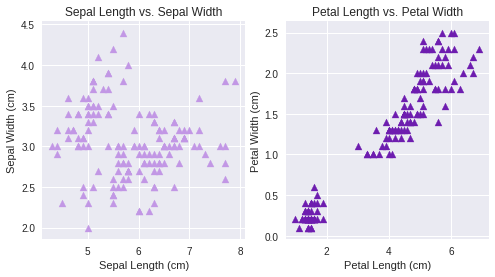

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax1, ax2 = ax

ax1.scatter(data.data[:, 0], data.data[:, 1], c='#c297e5', marker='^')
ax1.set_title("Sepal Length vs. Sepal Width [WHOLE DATASET]")
ax1.set_xlabel("Sepal Length (cm)")
ax1.set_ylabel("Sepal Width (cm)")

ax2.scatter(data.data[:, 2], data.data[:, 3], c='#6e1daf', marker='^')
ax2.set_title("Petal Length vs. Petal Width [WHOLE DATASET]")
ax2.set_xlabel("Petal Length (cm)")
ax2.set_ylabel("Petal Width (cm)")

RED - Iris Setosa
BLUE - Iris Versicolor
GREEN - Iris Virginica


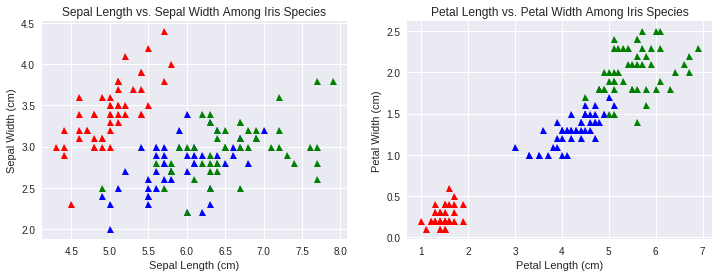

In [50]:
fig, axis = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axis

for i, species in enumerate(data.target):
  if species == 0:
    ax1.plot(data.data[i, 0], data.data[i, 1], 'r^', label='setosa')
    
  elif species == 1:
    ax1.plot(data.data[i, 0], data.data[i, 1], 'b^', label='versicolor')
  else:
    ax1.plot(data.data[i, 0], data.data[i, 1], 'g^', label='virginica')
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Sepal Width (cm)')
ax1.set_title('Sepal Length vs. Sepal Width Among Iris Species')

for i, species in enumerate(data.target):
  if species == 0:
    ax2.plot(data.data[i, 2], data.data[i, 3], 'r^', label='setosa')
    
  elif species == 1:
    ax2.plot(data.data[i, 2], data.data[i, 3], 'b^', label='versicolor')
  else:
    ax2.plot(data.data[i, 2], data.data[i, 3], 'g^', label='virginica')
ax2.set_xlabel('Petal Length (cm)')
ax2.set_ylabel('Petal Width (cm)')
ax2.set_title('Petal Length vs. Petal Width Among Iris Species')

# TODO - fix so the legend works
print('RED - Iris Setosa')
print('BLUE - Iris Versicolor')
print('GREEN - Iris Virginica')